In [1]:
import os
from pathlib import Path

def root_dir(marker="EXPLib"):
    cwd = Path.cwd()
    # if cwd already contains the marker
    if (cwd / marker).is_dir():
        return cwd
    # otherwise walk up the parents
    for p in cwd.parents:
        if (p / marker).is_dir():
            return p
    raise FileNotFoundError(f"Root marker '{marker}' not found")

os.chdir(root_dir())
#print(os.getcwd())

In [2]:
from EXPLib.xai_library.model_explainers.model_utils.toymodel_utils import load_and_configure_model, preprocess_image
from EXPLib.xai_library.model_explainers.uncertainty_models import  toymodel_uncertainties
import torch


In [7]:
image_path = './EXPLib/datasets/Camera/toy_model_v1_inference/dev/images'
image_file = 'rgb_0000079.png'
weight_path = './EXPLib/dl_component/CNN/Object_Detectors/toy_model_v1'
weight_file = 'aikonet_toymodelv1_ssdlite.pth'
model_name = "ssdlite320_mobilenet_v3_large"
num_classes = 2

############################################################################
# Check if a GPU is available and if not, use a CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [8]:
toymodel = load_and_configure_model(model_name, weight_path, weight_file, num_classes, device)
model_with_dropout = toymodel_uncertainties.SSDWithDropout(toymodel)
image = preprocess_image(image_path, image_file, device)

In [9]:
# Predict with uncertainty
outputs = toymodel_uncertainties.predict_with_uncertainty(model_with_dropout, image, n_iter=10)

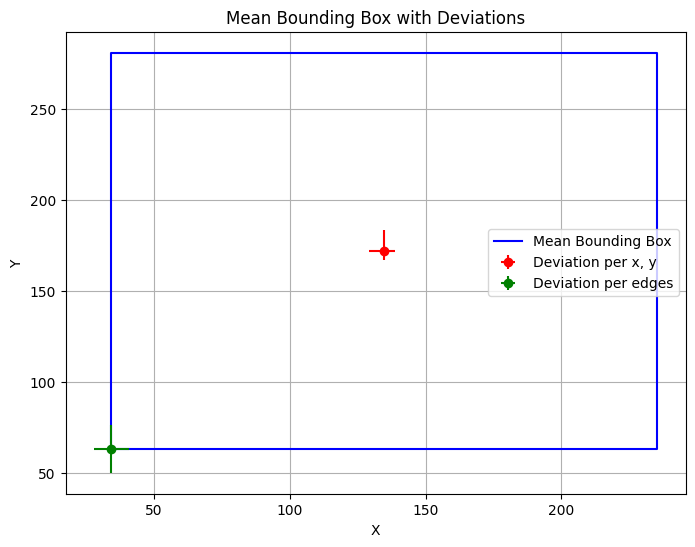

In [10]:
toymodel_uncertainties.compute_statistics_and_plot(toymodel_uncertainties.convert_output_to_cpu(outputs))